In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
data_ss_train_df = pd.read_csv('data_smin_ss_train_csv')
data_ss_test_df = pd.read_csv('data_ss_test_csv')
data_ss_val_df = pd.read_csv('data_ss_val_csv')

data_train_df = pd.read_csv("data_train_csv")
data_test_df = pd.read_csv("data_test_csv")
data_val_df = pd.read_csv("data_val_csv")

dl_train_df = data_train_df[['Wickets taken', 'Remainder', 'Winner_num']]
dl_test_df = data_test_df[['Wickets taken', 'Remainder', 'Winner_num']]
dl_val_df = data_val_df[['Wickets taken', 'Remainder', 'Winner_num']]

In [3]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [4]:
labels = ['Team 1', 'Tie', 'Team 2']

In [5]:
X_ss_train, X_ss_test, X_ss_val, y_ss_train, y_ss_test, y_ss_val = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, None, None)
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample', 20)
X_dl_train, X_dl_test, X_dl_val, y_dl_train, y_dl_test, y_dl_val = data_format(dl_train_df, dl_test_df, dl_val_df, None, None)

In [6]:
sdfasdf

NameError: name 'sdfasdf' is not defined

DL baseline model

In [ ]:
# Define the model
model = models.Sequential()

X_train_dim = X_dl_train.shape[1]

# Add input layer and hidden layers
model.add(layers.Dense(64, activation='relu', input_dim=X_train_dim))
model.add(layers.Dense(32, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])
#https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy#:~:text=Mathematically%20there%20is%20no%20difference,000%20samples)%20show%20no%20difference.

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.6080 - accuracy: 0.7128 - val_loss: 0.5912 - val_accuracy: 0.7261
Epoch 2/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5930 - accuracy: 0.7237 - val_loss: 0.5929 - val_accuracy: 0.7240
Epoch 3/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5901 - accuracy: 0.7260 - val_loss: 0.5930 - val_accuracy: 0.7233
Epoch 4/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5889 - accuracy: 0.7265 - val_loss: 0.5929 - val_accuracy: 0.7269
Epoch 5/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5881 - accuracy: 0.7258 - val_loss: 0.5904 - val_accuracy: 0.7273
Epoch 6/30
6189/6189 [==============================] - 9s 1ms/step - loss: 0.5877 - accuracy: 0.7263 - val_loss: 0.5873 - val_accuracy: 0.7282
Epoch 7/30
6189/6189 [==============================] - 25s 4ms/step - loss: 0.5873 - accuracy: 0.7264 - val_loss: 0.5878 - val_accuracy

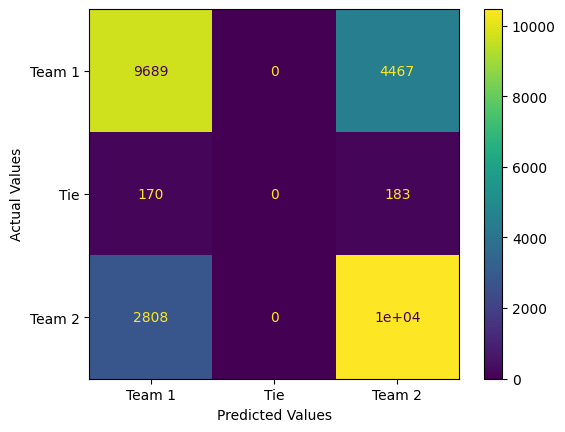

              precision    recall  f1-score   support

      Team 1       0.76      0.68      0.72     14156
         Tie       0.00      0.00      0.00       353
      Team 2       0.69      0.79      0.74     13273

    accuracy                           0.73     27782
   macro avg       0.49      0.49      0.49     27782
weighted avg       0.72      0.73      0.72     27782



C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469

In [ ]:
history = model.fit(X_dl_train, y_dl_train, epochs=30, batch_size=32, validation_data=(X_dl_val, y_dl_val))

test_loss, test_acc = model.evaluate(X_dl_test, y_dl_test)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(X_dl_test)

y_test_pred = model.predict(X_dl_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_dl_test, y_test_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_dl_test, y_test_pred_classes, target_names=labels))

Baseline Neural Network from data

In [ ]:
# Define the model
model = models.Sequential()

X_train_dim = X_ss_train.shape[1]

# Add input layer and hidden layers
model.add(layers.Dense(64, activation='relu', input_dim=X_train_dim))
model.add(layers.Dense(32, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])
#https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy#:~:text=Mathematically%20there%20is%20no%20difference,000%20samples)%20show%20no%20difference.

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2691 (10.51 KB)
Trainable params: 2691 (10.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.5462 - accuracy: 0.7648 - val_loss: 0.6066 - val_accuracy: 0.7146
Epoch 2/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.4046 - accuracy: 0.8161 - val_loss: 0.5401 - val_accuracy: 0.7390
Epoch 3/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3764 - accuracy: 0.8256 - val_loss: 0.5463 - val_accuracy: 0.7431
Epoch 4/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3615 - accuracy: 0.8310 - val_loss: 0.5185 - val_accuracy: 0.7530
Epoch 5/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3503 - accuracy: 0.8355 - val_loss: 0.5066 - val_accuracy: 0.7591
Epoch 6/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3427 - accuracy: 0.8387 - val_loss: 0.4967 - val_accuracy: 0.7610
Epoch 7/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3370 - accuracy: 0.8413 - val_loss: 0.4747 - val_ac

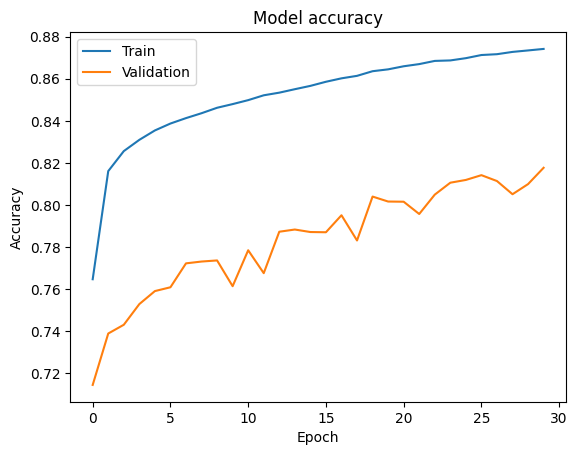

869/869 [==============================] - 1s 678us/step


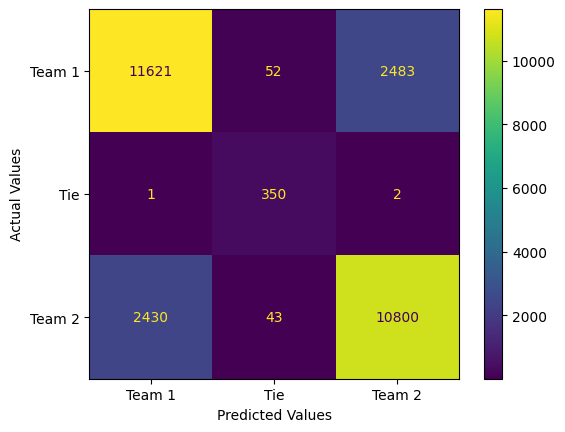

              precision    recall  f1-score   support

      Team 1       0.83      0.82      0.82     14156
         Tie       0.79      0.99      0.88       353
      Team 2       0.81      0.81      0.81     13273

    accuracy                           0.82     27782
   macro avg       0.81      0.88      0.84     27782
weighted avg       0.82      0.82      0.82     27782



In [ ]:
history = model.fit(X_ss_train, y_ss_train, epochs=30, batch_size=32, validation_data=(X_ss_val, y_ss_val))

test_loss, test_acc = model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(X_ss_test)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

y_test_pred = model.predict(X_ss_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_ss_test, y_test_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_ss_test, y_test_pred_classes, target_names=labels))

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/#:~:text=in%20general%2C%20it%20is%20not,greater%20than%2010%5E%2D6.

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

NEW ATTEMPT

In [ ]:
asdfsf

NameError: name 'asdfsf' is not defined

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
param_grid = {
    #Didn't include 0 as that would mean the data was linearly separable
    'hidden_layers': [1, 2, 3, 4, 5],
    'neurons': [50, 100, 150, 200, 250, 300],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
    }

In [20]:
#Weights still assigned randomly but in a reproducible way
np.random.seed(7)
tf.random.set_seed(7)

def create_model(hidden_layers, neurons, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))  #3 classes and therefore cannot use Sigmoid
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [9]:
#Weights still assigned randomly but in a reproducible way
np.random.seed(7)
tf.random.set_seed(7)

def create_model(hidden_layers, neurons, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))  #3 classes and therefore cannot use Sigmoid
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Shape of input is same as my independent variables in training set
input_dim = X_ss_train.shape[1]


# lists
hidden_layers_list = []
neurons_list = []
dropout_rate_list = []
learning_rate_list = []
epochs_list = []
train_accuracy_list = []
val_accuracy_list = []

# Track the best model and its performance
best_model = None
best_epochs = float('inf')
best_accuracy = 0.0

# Iterate over hyperparameter combinations
for hidden_layers in param_grid['hidden_layers']:
    for neurons in param_grid['neurons']:
        for dropout_rate in param_grid['dropout_rate']:
            for learning_rate in param_grid['learning_rate']:
                print(f"Training model with {hidden_layers} hidden layers, {neurons} neurons, "
                      f"{dropout_rate} dropout, and {learning_rate} learning rate.")
                
                # Create the model
                model = create_model(hidden_layers, neurons, dropout_rate, learning_rate)
                
                # Set up early stopping - Patience chosen so that there's less of a chance of getting caught in a local minima 
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


                # Train the model
                history = model.fit(X_ss_train_sample, y_ss_train_sample, epochs=200, batch_size=32,
                                    validation_data=(X_ss_val_sample, y_ss_val_sample), callbacks=[early_stopping])
                

                
                # Get the number of epochs it took for early stopping
                epochs = len(history.history['loss'])
                print(f"Early stopped after {epochs} epochs.")
                
                #Evaliud
                _, train_accuracy = model.evaluate(X_ss_train_sample, y_ss_train_sample)

                # Evaluate on validation set
                _, val_accuracy = model.evaluate(X_ss_val_sample, y_ss_val_sample)
                print(f"Validation accuracy: {val_accuracy}\n")

                hidden_layers_list.append(hidden_layers)
                neurons_list.append(neurons)
                dropout_rate_list.append(dropout_rate)
                learning_rate_list.append(learning_rate)
                epochs_list.append(epochs)
                train_accuracy_list.append(train_accuracy)
                val_accuracy_list.append(val_accuracy)

                
                
                # Check if this model is the best so far
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_model = model
                    best_epochs = epochs
                    best_hidden_layers = hidden_layers
                    best_neurons = neurons
                    best_dropout_rate = dropout_rate
                    best_learning_rate = learning_rate


print(f"Best model achieved {best_accuracy} accuracy on the validation set after {best_epochs} epochs, {best_hidden_layers} layers, {best_neurons} neurons, {best_dropout_rate} dropout rate and {best_learning_rate} learning rate")

params_df = pd.DataFrame({'hidden layers': hidden_layers_list, 'neurons': neurons_list, 'dropout rate': dropout_rate_list, 'learning rate': learning_rate_list, 'epochs': epochs_list, 'train accuracy': train_accuracy_list, 'val accuracy': val_accuracy_list})

Training model with 1 hidden layers, 50 neurons, 0.1 dropout, and 0.0001 learning rate.
Epoch 1/200
463/463 [==============================] - 1s 1ms/step - loss: 1.1650 - accuracy: 0.3773 - val_loss: 1.0216 - val_accuracy: 0.4521
Epoch 2/200
463/463 [==============================] - 1s 1ms/step - loss: 1.0370 - accuracy: 0.4635 - val_loss: 0.9658 - val_accuracy: 0.5878
Epoch 3/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9914 - accuracy: 0.4968 - val_loss: 0.9585 - val_accuracy: 0.6030
Epoch 4/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9709 - accuracy: 0.5136 - val_loss: 0.9519 - val_accuracy: 0.6019
Epoch 5/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9633 - accuracy: 0.5207 - val_loss: 0.9454 - val_accuracy: 0.6026
Epoch 6/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9517 - accuracy: 0.5324 - val_loss: 0.9411 - val_accuracy: 0.5997
Epoch 7/200
463/463 [==============================] -

In [16]:
params_df.sort_values('val accuracy', axis=0, ascending=False, inplace=True)
params_df = params_df.reset_index(drop=True)
params_df.to_csv('params.csv')

In [17]:
params_df.head(10)

hidden layers  neurons  dropout rate  learning rate  epochs   
0              3      250           0.1         0.0010      55  \
1              5      300           0.1         0.0001     116   
2              4      300           0.1         0.0010      40   
3              4      250           0.1         0.0010      45   
4              5      300           0.1         0.0010      48   
5              3      300           0.1         0.0010      45   
6              3      250           0.2         0.0010      66   
7              5      250           0.1         0.0010      46   
8              4      200           0.1         0.0010      44   
9              3      300           0.2         0.0010      55   

   train accuracy  val accuracy  
0        0.933270      0.842693  
1        0.940767      0.838373  
2        0.924355      0.831893  
3        0.924558      0.828294  
4        0.927192      0.827214  
5        0.926314      0.825774  
6        0.917669      0.823254  
7        0.921586      0.823254  
8        0.913481      0.820734  
9        0.913413      0.818935

In [12]:
print("NN Hyperparameter training no learning_rate")
np.random.seed(7)
tf.random.set_seed(7)

def create_model(hidden_layers, neurons, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))  #3 classes and therefore cannot use Sigmoid
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Shape of input is same as my independent variables in training set
input_dim = X_ss_train.shape[1]


# lists
hidden_layers_list = []
neurons_list = []
dropout_rate_list = []
#learning_rate_list = []
epochs_list = []
train_accuracy_list = []
val_accuracy_list = []

# Track the best model and its performance
best_model = None
best_epochs = float('inf')
best_accuracy = 0.0

# Iterate over hyperparameter combinations
for hidden_layers in param_grid['hidden_layers']:
    for neurons in param_grid['neurons']:
        for dropout_rate in param_grid['dropout_rate']:
            #for learning_rate in param_grid['learning_rate']:
            print(f"Training model with {hidden_layers} hidden layers, {neurons} neurons, {dropout_rate} dropout")
        
            # Create the model
            model = create_model(hidden_layers, neurons, dropout_rate)
                
            # Set up early stopping - Patience chosen so that there's less of a chance of getting caught in a local minima 
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


            # Train the model
            history = model.fit(X_ss_train_sample, y_ss_train_sample, epochs=200, batch_size=32, validation_data=(X_ss_val_sample, y_ss_val_sample), callbacks=[early_stopping])
                
            # Get the number of epochs it took for early stopping
            epochs = len(history.history['loss'])
            print(f"Early stopped after {epochs} epochs.")
                
            #Evaliud
            _, train_accuracy = model.evaluate(X_ss_train_sample, y_ss_train_sample)

            # Evaluate on validation set
            _, val_accuracy = model.evaluate(X_ss_val_sample, y_ss_val_sample)
            print(f"Validation accuracy: {val_accuracy}\n")

            hidden_layers_list.append(hidden_layers)
            neurons_list.append(neurons)
            dropout_rate_list.append(dropout_rate)
            epochs_list.append(epochs)
            train_accuracy_list.append(train_accuracy)
            val_accuracy_list.append(val_accuracy)

                
                
            # Check if this model is the best so far
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model
                best_epochs = epochs
                best_hidden_layers = hidden_layers
                best_neurons = neurons
                best_dropout_rate = dropout_rate


print(f"Best model achieved {best_accuracy} accuracy on the validation set after {best_epochs} epochs, {best_hidden_layers} layers, {best_neurons} neurons, {best_dropout_rate} dropout rate")
params_nolr_df = pd.DataFrame({'hidden layers': hidden_layers_list, 'neurons': neurons_list, 'dropout rate': dropout_rate_list, 'epochs': epochs_list, 'train accuracy': train_accuracy_list, 'val accuracy': val_accuracy_list})

NN Hyperparameter training no learning_rate
Training model with 1 hidden layers, 50 neurons, 0.1 dropout
Epoch 1/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9683 - accuracy: 0.5203 - val_loss: 0.9214 - val_accuracy: 0.6084
Epoch 2/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9183 - accuracy: 0.5607 - val_loss: 0.8963 - val_accuracy: 0.6170
Epoch 3/200
463/463 [==============================] - 1s 1ms/step - loss: 0.8929 - accuracy: 0.5801 - val_loss: 0.9036 - val_accuracy: 0.6109
Epoch 4/200
463/463 [==============================] - 1s 1ms/step - loss: 0.8767 - accuracy: 0.5907 - val_loss: 0.8871 - val_accuracy: 0.6145
Epoch 5/200
463/463 [==============================] - 1s 1ms/step - loss: 0.8590 - accuracy: 0.6038 - val_loss: 0.9017 - val_accuracy: 0.6022
Epoch 6/200
463/463 [==============================] - 1s 1ms/step - loss: 0.8427 - accuracy: 0.6154 - val_loss: 0.8778 - val_accuracy: 0.6174
Epoch 7/200
463/463 [================

In [ ]:
params_nolr_df.sort_values('accuracy', axis=0, ascending=False, inplace=True)
params_nolr_df = params_df.reset_index(drop=True)
params_nolr_df.to_csv('params_nolr.csv')

In [ ]:
params_nolr_df.head(10)

In [18]:
#no learning rate training
model = create_model(4, 300, 0.1)
model.fit(X_ss_train, y_ss_train, epochs=51, batch_size=32, validation_data=(X_ss_val, y_ss_val))


train_loss, train_accuracy = model.evaluate(X_ss_train, y_ss_train)
val_loss, val_accuracy = model.evaluate(X_ss_val, y_ss_val)
test_loss, test_accuracy = model.evaluate(X_ss_test, y_ss_test)

print(f'Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy.2f}, Test Accuracy: {test_accuracy.2f}')
print(f'Training Loss {train_loss}, Validation Loss: {val_loss}, Test Loss: {test_loss}')

Epoch 1/51
9255/9255 [==============================] - 43s 5ms/step - loss: 0.4192 - accuracy: 0.8084 - val_loss: 0.4479 - val_accuracy: 0.7846
Epoch 2/51
9255/9255 [==============================] - 41s 4ms/step - loss: 0.2998 - accuracy: 0.8607 - val_loss: 0.3515 - val_accuracy: 0.8363
Epoch 3/51
9255/9255 [==============================] - 40s 4ms/step - loss: 0.2549 - accuracy: 0.8827 - val_loss: 0.2991 - val_accuracy: 0.8620
Epoch 4/51
9255/9255 [==============================] - 40s 4ms/step - loss: 0.2296 - accuracy: 0.8953 - val_loss: 0.2737 - val_accuracy: 0.8752
Epoch 5/51
9255/9255 [==============================] - 40s 4ms/step - loss: 0.2130 - accuracy: 0.9034 - val_loss: 0.2532 - val_accuracy: 0.8825
Epoch 6/51
9255/9255 [==============================] - 40s 4ms/step - loss: 0.2021 - accuracy: 0.9088 - val_loss: 0.2394 - val_accuracy: 0.8914
Epoch 7/51
9255/9255 [==============================] - 40s 4ms/step - loss: 0.1934 - accuracy: 0.9132 - val_loss: 0.2279 - val_ac

In [21]:
#Learning rate trained
#accuracy on the validation set after 55 epochs, 3 layers, 250 neurons, 0.1 dropout rate and 0.001 learning rate
model = create_model(3, 250, 0.1, 0.001)
model.fit(X_ss_train, y_ss_train, epochs=55, batch_size=32, validation_data=(X_ss_val, y_ss_val))


train_loss, train_accuracy = model.evaluate(X_ss_train, y_ss_train)
val_loss, val_accuracy = model.evaluate(X_ss_val, y_ss_val)
test_loss, test_accuracy = model.evaluate(X_ss_test, y_ss_test)

print(f'Training Accuracy: {train_accuracy: .2f}, Validation Accuracy: {val_accuracy: .2f}, Test Accuracy: {test_accuracy: .2f}')
print(f'Training Loss {train_loss: .2f}, Validation Loss: {val_loss: .2f}, Test Loss: {test_loss: .2f}')

Epoch 1/55
9255/9255 [==============================] - 24s 3ms/step - loss: 0.4284 - accuracy: 0.8051 - val_loss: 0.4781 - val_accuracy: 0.7699
Epoch 2/55
9255/9255 [==============================] - 23s 3ms/step - loss: 0.3124 - accuracy: 0.8541 - val_loss: 0.3795 - val_accuracy: 0.8274
Epoch 3/55
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2696 - accuracy: 0.8760 - val_loss: 0.3366 - val_accuracy: 0.8473
Epoch 4/55
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2441 - accuracy: 0.8888 - val_loss: 0.2938 - val_accuracy: 0.8705
Epoch 5/55
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2262 - accuracy: 0.8979 - val_loss: 0.2644 - val_accuracy: 0.8814
Epoch 6/55
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2149 - accuracy: 0.9029 - val_loss: 0.2525 - val_accuracy: 0.8890
Epoch 7/55
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2045 - accuracy: 0.9083 - val_loss: 0.2435 - val_ac

In [27]:
print(f'Training Accuracy: {train_accuracy: .2f}, Validation Accuracy: {val_accuracy: .2f}, Test Accuracy: {test_accuracy: .2f}')
print(f'Training Loss {train_loss: .2f}, Validation Loss: {val_loss: .2f}, Test Loss: {test_loss: .2f}')

Training Accuracy:  0.95, Validation Accuracy:  0.93, Test Accuracy:  0.93
Training Loss  0.10, Validation Loss:  0.15, Test Loss:  0.15


869/869 [==============================] - 2s 2ms/step


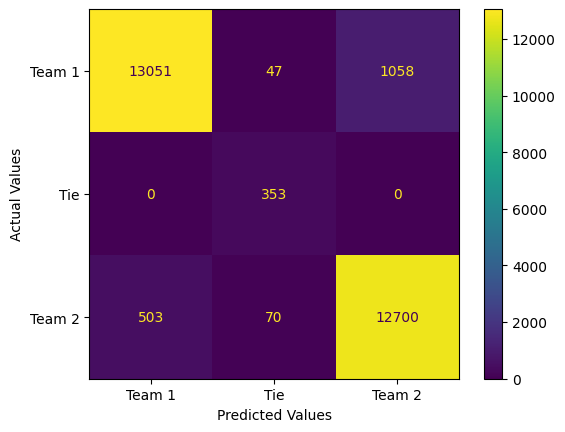

              precision    recall  f1-score   support

      Team 1       0.96      0.92      0.94     14156
         Tie       0.75      1.00      0.86       353
      Team 2       0.92      0.96      0.94     13273

    accuracy                           0.94     27782
   macro avg       0.88      0.96      0.91     27782
weighted avg       0.94      0.94      0.94     27782



In [ ]:
y_test_pred = model.predict(X_ss_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_ss_test, y_test_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_ss_test, y_test_pred_classes, target_names=labels))

In [ ]:
y_test_pred_list  = []
for y in y_test_pred:
    if y==0:
        y_test_pred_list.append("Y")
    elif y == 2:
        y_test_pred_list.append("N")
    elif y==1:
        y_test_pred_list.append("T")

y_test_pred_df = pd.DataFrame(y_test_pred_list, columns=["Winner Bat First"])

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(x='Winner Bat First', data=y_test_pred_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Did the Winner Bat First? SVM')
plt.show()